# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

In this project, we will use the **BeautifulSoup** library from **bs4** to do web scraping. BeautifulSoup is a Python library that makes it easier for us to retrieve information from a web page that is in the form of HTML and XML documents. We are going to use data from the IMDb website, which is list of movies between 2019-01-01 and 2019-12-31 sorted by popularity. IMDb is an online database of information related to films, television programs, home videos, video games, and streaming content online. Here we will only take seven most popular movies for our further analysis.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

As we can see we get a very unstructured and complex HTML, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

The data that we get through `url_get.content` still contains the entire HTML script of the web page. The next step is to find the right keywords, which is an HTML tag, to get the part of the data that we want to retrieve from the HTML script. 

Here we will take part of the HTML script which is list of movies on the web page using the `.find()` and `.find_all()` function. To get the right HTML tag that contains this information, we can right-click on the part of movie list, then select inspect.

In [4]:
movie_list = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(movie_list.prettify()[1:500])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt8111088/">
     <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OW


In [5]:
list_content = movie_list.find_all('div', attrs={'class':'lister-item-content'})
len(list_content)

50

**Title**

In [6]:
header = []

for i in range(0, len(list_content)):
    get_header = list_content[i].find_all('h3', attrs={'class':'lister-item-header'})
    header.append(get_header)
    
header[:2]

[[<h3 class="lister-item-header">
  <span class="lister-item-index unbold text-primary">1.</span>
  <a href="/title/tt8111088/">The Mandalorian</a>
  <span class="lister-item-year text-muted unbold">(2019– )</span>
  </h3>],
 [<h3 class="lister-item-header">
  <span class="lister-item-index unbold text-primary">2.</span>
  <a href="/title/tt5607976/">His Dark Materials</a>
  <span class="lister-item-year text-muted unbold">(2019– )</span>
  </h3>]]

**Runtime and Genre**

In [7]:
runtime_and_genre = []

for i in range(0, len(list_content)):
    get_runtime_and_genre = list_content[i].find_all('p', attrs={'class':'text-muted'})[0]
    runtime_and_genre.append(get_runtime_and_genre)
    
runtime_and_genre[:2]

[<p class="text-muted">
 <span class="runtime">40 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Adventure, Sci-Fi            </span>
 </p>,
 <p class="text-muted">
 <span class="runtime">60 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Adventure, Drama, Family            </span>
 </p>]

**IMDb Rating**

In [8]:
ratings = []

for i in range(0, len(list_content)):
    get_ratings = list_content[i].find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})
    ratings.append(get_ratings)
    
ratings[:2]

[[<div class="inline-block ratings-imdb-rating" data-value="8.7" name="ir">
  <span class="global-sprite rating-star imdb-rating"></span>
  <strong>8.7</strong>
  </div>],
 [<div class="inline-block ratings-imdb-rating" data-value="7.9" name="ir">
  <span class="global-sprite rating-star imdb-rating"></span>
  <strong>7.9</strong>
  </div>]]

**Metascore**

In [9]:
ratings_metascore = []

for i in range(0, len(list_content)):
    get_ratings_metascore = list_content[i].find_all('div', attrs={'class':'inline-block ratings-metascore'})
    ratings_metascore.append(get_ratings_metascore)
    
ratings_metascore[:4]

[[],
 [],
 [],
 [<div class="inline-block ratings-metascore">
  <span class="metascore mixed">57        </span>
          Metascore
              </div>]]

**Votes**

In [10]:
num_votes = []

for i in range(0, len(list_content)):
    get_num_votes = list_content[i].find_all('p', attrs={'class':'sort-num_votes-visible'})
    num_votes.append(get_num_votes)
    
num_votes[:2]

[[<p class="sort-num_votes-visible">
  <span class="text-muted">Votes:</span>
  <span data-value="220166" name="nv">220,166</span>
  </p>],
 [<p class="sort-num_votes-visible">
  <span class="text-muted">Votes:</span>
  <span data-value="42253" name="nv">42,253</span>
  </p>]]

From the above steps we have succeeded in getting the part of the HTML script that stores the data information we want to retrieve. We will use data on the title, runtime, genre, IMDB rating, metascore, and the number of votes for each movie. 

Next is to do the scrapping process. We will take the value of each data for each movie by doing the looping process as many as the number of films on the web page. Every value obtained will be collected in a variable named **temp**.

In [11]:
temp = [] #initiating a tuple

for i in range(0, len(list_content)):
    #get title
    title = header[i][0].find('a').text
    
    #get runtime
    runtime = runtime_and_genre[i].find('span', attrs={'class':'runtime'})
    
    if (runtime != None):
        runtime = runtime.text
        
    #getruntime
    genre = runtime_and_genre[i].find('span', attrs={'class':'genre'}).text
    genre = genre.strip() #for removing the excess whitespace
    genre = genre.replace(' ', '').split(',')

    #get imdb rating
    imdb_rating = ratings[i][0].find('strong').text
    
    #get metascore
    if (len(ratings_metascore[i])):
        metascore = ratings_metascore[i][0].find('span').text
        metascore = metascore.strip()
    else:
        metascore = None
        
    #get votes
    votes = num_votes[i][0].find('span', attrs={'name':'nv'}).text
    
    for j in range(0, len(genre)):
        temp.append((title, runtime, genre[j], imdb_rating, metascore, votes))
    
temp[:5]

[('The Mandalorian', '40 min', 'Action', '8.7', None, '220,166'),
 ('The Mandalorian', '40 min', 'Adventure', '8.7', None, '220,166'),
 ('The Mandalorian', '40 min', 'Sci-Fi', '8.7', None, '220,166'),
 ('His Dark Materials', '60 min', 'Adventure', '7.9', None, '42,253'),
 ('His Dark Materials', '60 min', 'Drama', '7.9', None, '42,253')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [59]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Title', 'Runtime (min)', 'Genre', 'IMDb Rating', 'Metascore', 'Votes'))
df.head()

,Title,Runtime (min),Genre,IMDb Rating,Metascore,Votes
0,The Mandalorian,40 min,Action,8.7,None,"220,166"
1,The Mandalorian,40 min,Adventure,8.7,None,"220,166"
2,The Mandalorian,40 min,Sci-Fi,8.7,None,"220,166"
3,His Dark Materials,60 min,Adventure,7.9,None,"42,253"
4,His Dark Materials,60 min,Drama,7.9,None,"42,253"


After the data is in the form of a dataframe, we can perform data cleaning process such as changing the data type, filling in missing values, and for this movie list data we can remove **min** in the runtime column and **comma** in the votes column so that these two columns can be converted into a more precise data type.

In [60]:
df['Runtime (min)'] = df['Runtime (min)'].str.replace('min', '')
df['Votes'] = df['Votes'].str.replace(',', '')

df.head()

,Title,Runtime (min),Genre,IMDb Rating,Metascore,Votes
0,The Mandalorian,40,Action,8.7,None,220166
1,The Mandalorian,40,Adventure,8.7,None,220166
2,The Mandalorian,40,Sci-Fi,8.7,None,220166
3,His Dark Materials,60,Adventure,7.9,None,42253
4,His Dark Materials,60,Drama,7.9,None,42253


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
Title            132 non-null object
Runtime (min)    129 non-null object
Genre            132 non-null object
IMDb Rating      132 non-null object
Metascore        77 non-null object
Votes            132 non-null object
dtypes: object(6)
memory usage: 6.3+ KB


In [62]:
df[['Runtime (min)', 'Metascore']] = \
df[['Runtime (min)', 'Metascore']].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
Title            132 non-null object
Runtime (min)    132 non-null object
Genre            132 non-null object
IMDb Rating      132 non-null object
Metascore        132 non-null object
Votes            132 non-null object
dtypes: object(6)
memory usage: 6.3+ KB


In [63]:
df.describe(include='all').loc['unique']

Title            50
Runtime (min)    37
Genre            15
IMDb Rating      25
Metascore        23
Votes            50
Name: unique, dtype: object

In [64]:
#convert to category
df['Genre'] = df['Genre'].astype('category')

#convert to integer
df[['Runtime (min)', 'Metascore', 'Votes']] = \
df[['Runtime (min)', 'Metascore', 'Votes']].astype('int64')

#convert to float
df['IMDb Rating'] = df['IMDb Rating'].astype(float)

df.dtypes

Title              object
Runtime (min)       int64
Genre            category
IMDb Rating       float64
Metascore           int64
Votes               int64
dtype: object

In [72]:
top7 = df.drop('Genre', axis=1).drop_duplicates()[:7]
top7

,Title,Runtime (min),IMDb Rating,Metascore,Votes
0,The Mandalorian,40,8.7,0,220166
3,His Dark Materials,60,7.9,0,42253
6,The Boys,60,8.7,0,218101
9,Dreamland,98,5.7,57,1240
11,Jojo Rabbit,108,7.9,58,278400
14,Servant,30,7.6,0,15907
17,Wayne,30,8.4,0,8560


In [103]:
top7_genre = df.set_index('Title')['Genre']
top7_genre = top7_genre.loc[:'Wayne'].reset_index()

top7_genre

,Title,Genre
0,The Mandalorian,Action
1,The Mandalorian,Adventure
2,The Mandalorian,Sci-Fi
3,His Dark Materials,Adventure
4,His Dark Materials,Drama
5,His Dark Materials,Family
6,The Boys,Action
7,The Boys,Comedy
8,The Boys,Crime
9,Dreamland,Drama


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [22]:
import matplotlib.pyplot as plt

print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:ylabel='Title'>

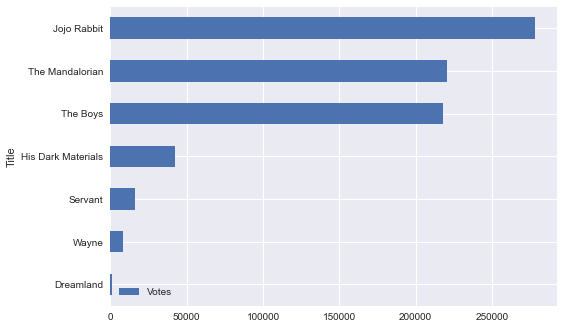

In [23]:
top7.sort_values('Votes').plot(kind='barh', x='Title', y='Votes')

<AxesSubplot:ylabel='Title'>

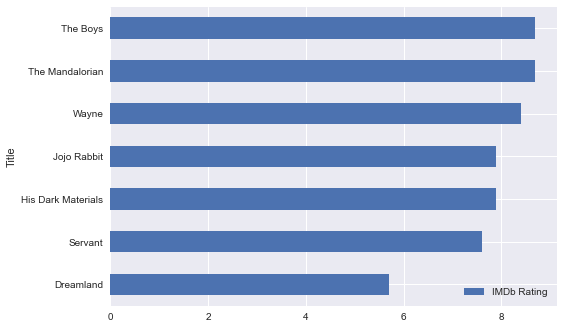

In [27]:
top7.sort_values('IMDb Rating').plot(kind='barh', x='Title', y='IMDb Rating')

<AxesSubplot:ylabel='Title'>

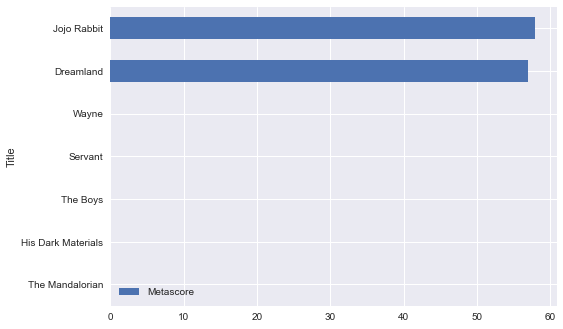

In [28]:
top7.sort_values('Metascore').plot(kind='barh', x='Title', y='Metascore')

<AxesSubplot:xlabel='Title'>

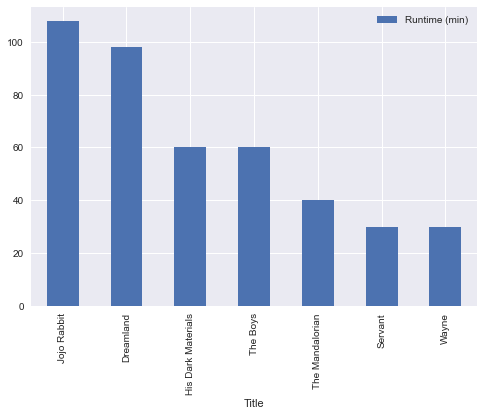

In [114]:
top7.sort_values('Runtime (min)', ascending=False).plot(kind='bar', x='Title', y='Runtime (min)')

<AxesSubplot:xlabel='Genre'>

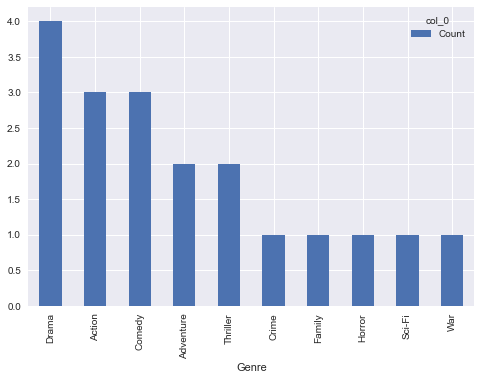

In [110]:
pd.crosstab(
    index=top7_genre['Genre'],
    columns='Count',
).sort_values('Count', ascending=False).plot(kind='bar')

From the results of the data visualization process, we can get the insight that the popularity of a movie is not influenced by the number of votes, IMDB rating, or metascore. We know that **The Mandalorian** is the most popular film based on the IMDb website, but it doesn't have the highest number of votes, IMDb ratings, or metascore. This can also be clarified by the explanation on the IMDb Community Forums, that the popularity of a film is determined based on page views of pages related to a movie.


Besides that, we can also see from the visualization that the film with the longest runtime of the 7 most popular movies is Jojo Rabbit with the first most genre is Drama, second is Action, and the third is Comedy.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.